We show how to manipulate the output formats of the workflow by using :
1) output text files from RASPA
2) CSV isotherms from postprocessing
3) JSON database from postprocessing

In [120]:
from src.output_parser import *
import pandas as pd
import glob,os

In [139]:
import matplotlib.pyplot as plt
import matplotlib.markers as markers

# Output files from RASPA

In [121]:
data_dir = '../tests_simple_adsorption/2024-01-09_10-57-48_test_isotherms_csv/'
iso_index = f'{data_dir}/simulations/index.csv'
df_index = pd.read_csv(iso_index)

In [122]:
structure = 'MIBQAR16_clean_coremof-2019'
molecule_name ='CO2'

In [123]:
# Select only the simulations corresponding to the targeted conditions
df_sim = df_index[(df_index["structure"]==structure)&\
        (df_index["molecule_name"]==molecule_name)]
df_sim

,cycles,forcefield,init_cycles,molecule_name,npoints,pressure,print_every,simkey,structure,temperature,unit_cells
5,20.0,GenericMOFs,10.0,CO2,5.0,10.0,5.0,sim0b91e988,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]"
6,20.0,GenericMOFs,10.0,CO2,5.0,250007.5,5.0,sim5d3b96a7,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]"
7,20.0,GenericMOFs,10.0,CO2,5.0,500005.0,5.0,sim18ba567a,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]"
8,20.0,GenericMOFs,10.0,CO2,5.0,750002.5,5.0,sim2c35d218,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]"
9,20.0,GenericMOFs,10.0,CO2,5.0,1000000.0,5.0,sim1f8ca334,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]"


In [124]:
# get the list of output files
list_files  = [glob.glob(f"{data_dir}/simulations/{simkey}/Output/System_0/*") for simkey in df_sim['simkey']]
list_files = sum(list_files, [])
list_files

['../tests_simple_adsorption/2024-01-09_10-57-48_test_isotherms_csv//simulations/sim0b91e988/Output/System_0/output_MIBQAR16_clean_coremof-2019_2.2.2_298.150000_10.data',
 '../tests_simple_adsorption/2024-01-09_10-57-48_test_isotherms_csv//simulations/sim5d3b96a7/Output/System_0/output_MIBQAR16_clean_coremof-2019_2.2.2_298.150000_250008.data',
 '../tests_simple_adsorption/2024-01-09_10-57-48_test_isotherms_csv//simulations/sim18ba567a/Output/System_0/output_MIBQAR16_clean_coremof-2019_2.2.2_298.150000_500005.data',
 '../tests_simple_adsorption/2024-01-09_10-57-48_test_isotherms_csv//simulations/sim2c35d218/Output/System_0/output_MIBQAR16_clean_coremof-2019_2.2.2_298.150000_750002.data',
 '../tests_simple_adsorption/2024-01-09_10-57-48_test_isotherms_csv//simulations/sim1f8ca334/Output/System_0/output_MIBQAR16_clean_coremof-2019_2.2.2_298.150000_1e+06.data']

In [125]:
results = []
for filename in list_files:
    with open(filename,'r') as f:
        string_output = f.read() 
    results.append(parse(string_output))
    
uptakes = [[r['Thermo/Baro-stat NHC parameters']['External Pressure'][0],
            r["Number of molecules"][molecule_name]
            ["Average loading absolute [cm^3 (STP)/cm^3 framework]"][0]]
           for r in results]

isotherm = pd.DataFrame(uptakes,columns=['pressure(Pa)','uptake(cm^3 (STP)/cm^3 framework)']).sort_values(by='pressure(Pa)')
isotherm['pressure(bar)']=isotherm['pressure(Pa)']/100000

/opt/.conda/envs/simple-adsorption-workflow/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='pressure(bar)', ylabel='uptake(cm^3 (STP)/cm^3 framework)'>

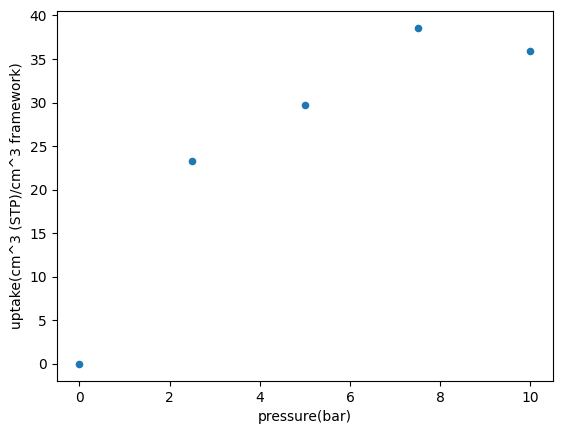

In [126]:
isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',kind='scatter')

# CSV isotherms

> Note : CSV files are created for each isotherms using `output_isotherms_to_csv()` function in `src.convert_data` module

In [127]:
os.listdir(f'{data_dir}/isotherms')

['index.csv',
 'iso058600ea.csv',
 'iso9336d1ec.csv',
 'isoacd8f691.csv',
 'iso39b4b42c.csv']

In [128]:
# Read the metadata for each isotherm
df_isotherm = pd.read_csv(f'{data_dir}/isotherms/index.csv')
df_isotherm.set_index('isokey',inplace=True)
df_isotherm.head()

,cycles,forcefield,init_cycles,molecule_name,npoints,pressure,print_every,simkeys,structure,temperature,unit_cells
isokey,,,,,,,,,,,
iso058600ea,20.0,GenericMOFs,10.0,CO2,5.0,10.0,5.0,['sim0b91e988' 'sim5d3b96a7' 'sim18ba567a' 'si...,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]"
isoacd8f691,20.0,GenericMOFs,10.0,CO2,5.0,10.0,5.0,['simf147b64b' 'sim8b2aaf52' 'sim2ad2ce16' 'si...,VOGTIV_clean_h_coremof-2019,298.15,"[4, 2, 2]"
iso39b4b42c,20.0,GenericMOFs,10.0,N2,5.0,10.0,5.0,['sim46c03584' 'sim5224a325' 'sim25274199' 'si...,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]"
iso9336d1ec,20.0,GenericMOFs,10.0,N2,5.0,10.0,5.0,['sim1cf51a92' 'sim6ec8908c' 'sima4191c3d' 'si...,VOGTIV_clean_h_coremof-2019,298.15,"[4, 2, 2]"


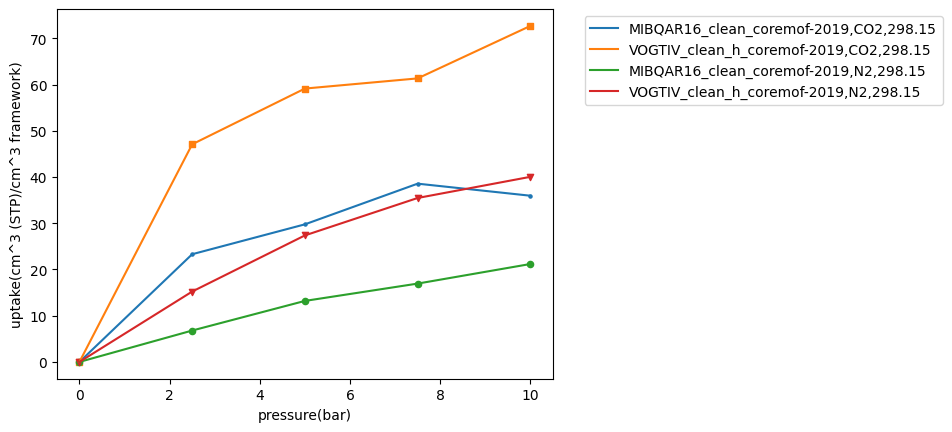

In [140]:
n_isotherms = df_isotherm.shape[0]
legends = []
cmap = plt.colormaps['tab10']
colors  = [cmap(i) for i in range(n_isotherms)]
ms = list(markers.MarkerStyle.markers)[:n_isotherms]
fig,ax = plt.subplots()
for i,(isokey,data) in enumerate(df_isotherm.iterrows()):
    isotherm = pd.read_csv(f'{data_dir}/isotherms/{isokey}.csv')
    isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',
                  kind='line',ax= ax,color=colors[i],legend=False)
    isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',
                  kind='scatter',ax= ax,color=colors[i],marker=ms[i])
    legends.append(','.join(map(str,data[['structure','molecule_name','temperature']].values)))
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles,legends,bbox_to_anchor=(1.05, 1), loc='upper left')

> Note : The calculations in the test runs used low number of cycles (`init_cycles`=10,`cycles`=10) which do not reflect equilibrium at all. This example data is used for convenience because the test runs only last a few seconds.

#  JSON isotherms

In [50]:
import json

In [63]:
data_dir  = '../tests_simple_adsorption/2024-01-09_11-58-32_test_output_json/'
with open(f'{data_dir}/isotherms/isotherms.json',"r") as f:
    file_contents = f.read()
parsed_json = json.loads(file_contents)

In [64]:
import pandas as pd

In [67]:
df_json = pd.DataFrame(parsed_json["isotherms"])
df_json

,pressure,simkey,Pressure(Pa),uptake(cm^3 (STP)/cm^3 framework),cycles,forcefield,init_cycles,molecule_name,npoints,print_every,structure,temperature,unit_cells,isokey
0,"[10.0, 250007.5, 500005.0, 750002.5, 1000000.0]","[sim88def204, sim25ba5c56, simacbc5d6b, simb37...","[10.0, 250008.0, 500005.0, 750002.0, 1000000.0]","[0.0, 21.6186680845, 32.5909569114, 47.9087066...",20.0,GenericMOFs,10.0,CO2,5.0,5.0,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]",iso6337900d
1,"[10.0, 250007.5, 500005.0, 750002.5, 1000000.0]","[sim7751b65a, simf253db96, simc7ce2f20, sim81a...","[10.0, 250008.0, 500005.0, 750002.0, 1000000.0]","[0.0, 56.8532521751, 72.6067074992, 91.5284555...",20.0,GenericMOFs,10.0,CO2,5.0,5.0,VOGTIV_clean_h_coremof-2019,298.15,"[4, 2, 2]",isoad8f9d15
2,"[10.0, 250007.5, 500005.0, 750002.5, 1000000.0]","[sim5770a744, sim3ca4d614, sime233e71b, sim3af...","[10.0, 250008.0, 500005.0, 750002.0, 1000000.0]","[0.0, 4.9972800597, 8.3650122739, 13.525247118...",20.0,GenericMOFs,10.0,N2,5.0,5.0,MIBQAR16_clean_coremof-2019,298.15,"[2, 2, 2]",isodd718b93
3,"[10.0, 250007.5, 500005.0, 750002.5, 1000000.0]","[sim03c271dc, sim4bf97d8e, simce1e12c9, sim9eb...","[10.0, 250008.0, 500005.0, 750002.0, 1000000.0]","[0.0, 18.3936992331, 32.2109756906, 35.9073171...",20.0,GenericMOFs,10.0,N2,5.0,5.0,VOGTIV_clean_h_coremof-2019,298.15,"[4, 2, 2]",isodc2a7152


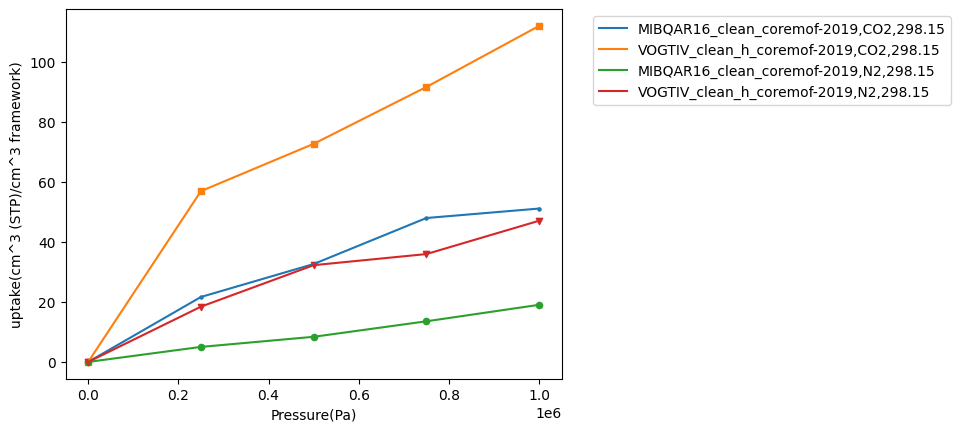

In [161]:
n_isotherms = df_json.shape[0]
legends = []
cmap = plt.colormaps['tab10']
colors  = [cmap(i) for i in range(n_isotherms)]
ms = list(markers.MarkerStyle.markers)[:n_isotherms]
fig,ax = plt.subplots()
x = "Pressure(Pa)"
y = "uptake(cm^3 (STP)/cm^3 framework)"
for i,row in df_json.iterrows():
    isotherm = pd.DataFrame({x:row[x],y:row[y]})
    isotherm.plot(x=x,y=y,kind='line',ax= ax,color=colors[i],legend=False)
    isotherm.plot(x=x,y=y,kind='scatter',ax= ax,color=colors[i],marker=ms[i])
    legends.append(','.join(map(str,row[['structure','molecule_name','temperature']].values)))
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles,legends,bbox_to_anchor=(1.05, 1), loc='upper left')

> Note : Since the simulation are not at equilibrium, the results differ a bit between the two test dataset